In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving framingham.csv to framingham (1).csv


In [ ]:
dataset= pd.read_csv('framingham.csv')

In [ ]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Pre-processing**

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(dataset.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dataset.shape

(3656, 16)

In [ ]:
dataset.mean()

male                 0.443654
age                 49.557440
education            1.979759
currentSmoker        0.489059
cigsPerDay           9.022155
BPMeds               0.030361
prevalentStroke      0.005744
prevalentHyp         0.311543
diabetes             0.027079
totChol            236.873085
sysBP              132.368025
diaBP               82.912062
BMI                 25.784185
heartRate           75.730580
glucose             81.856127
TenYearCHD           0.152352
dtype: float64

**Removing outliers**

<Axes: >

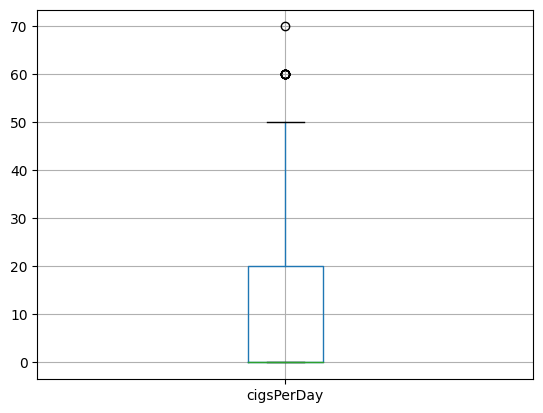

In [ ]:
dataset.boxplot(column='cigsPerDay')

In [ ]:
dataset.loc[dataset['cigsPerDay'] > 59, 'cigsPerDay'] = 9.02

<Axes: >

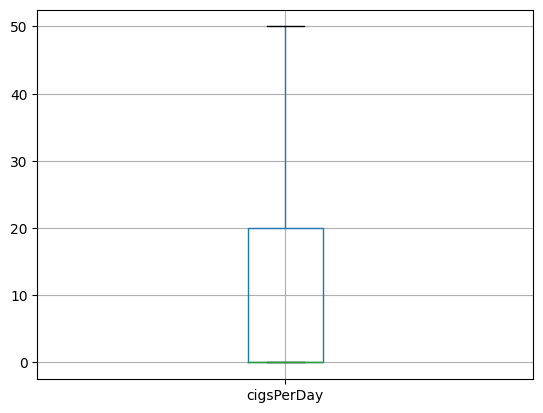

In [ ]:
dataset.boxplot(column='cigsPerDay') #after removing outliers

In [ ]:
dataset['totChol'].describe()

count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64

<Axes: >

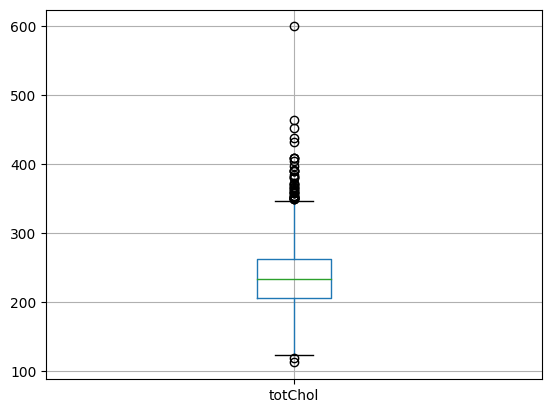

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset.loc[dataset['totChol'] > 480, 'totChol'] = 237

<Axes: >

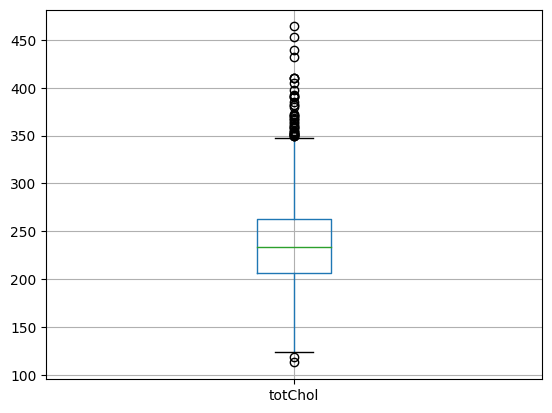

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset['sysBP'].describe()

count    3656.000000
mean      132.368025
std        22.092444
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

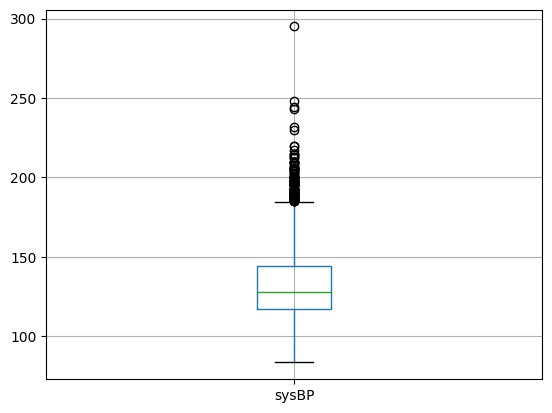

In [ ]:
dataset.boxplot(column='sysBP')

In [ ]:
dataset.loc[dataset['sysBP'] > 270, 'sysBP'] = dataset['sysBP'].median()

<Axes: >

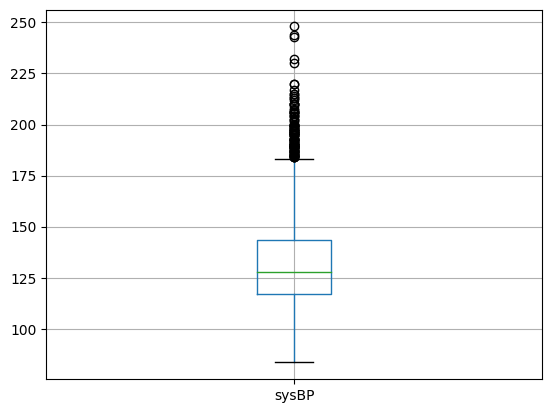

In [ ]:
dataset.boxplot(column='sysBP') #After removing the outliers

In [ ]:
dataset['BMI'].describe()

count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

<Axes: >

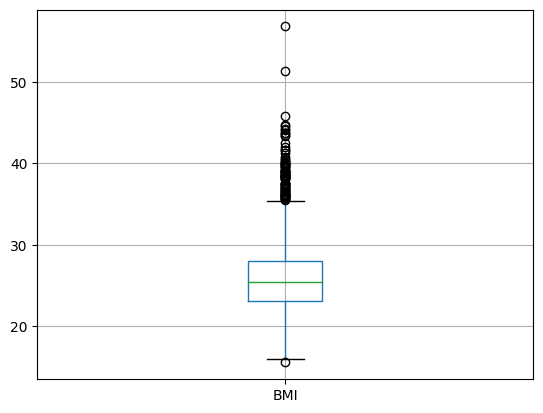

In [ ]:
dataset.boxplot(column='BMI')

In [ ]:
dataset.loc[dataset['BMI'] > 49, 'BMI'] = dataset['BMI'].median()

<Axes: >

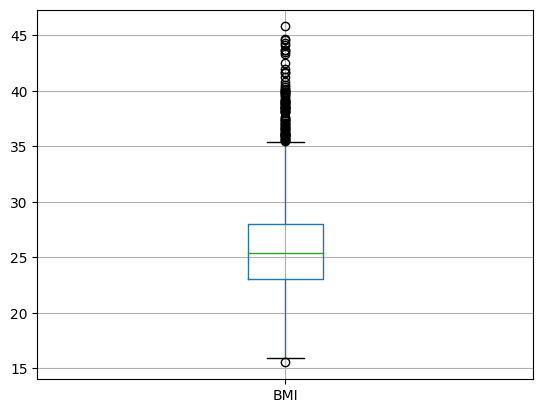

In [ ]:
dataset.boxplot(column='BMI') #After removing the outliers

In [ ]:
dataset['heartRate'].describe()

count    3656.000000
mean       75.730580
std        11.982952
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

<Axes: >

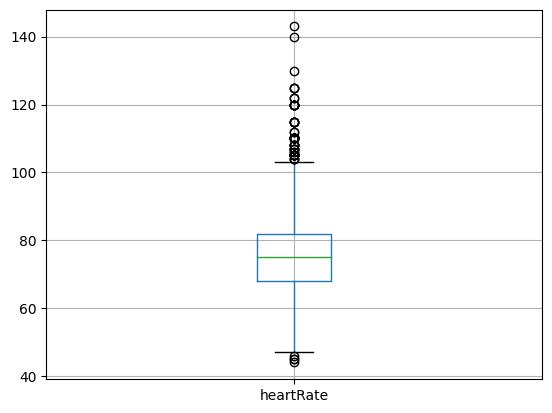

In [ ]:
dataset.boxplot(column='heartRate')

In [ ]:
dataset['glucose'].describe()

count    3656.000000
mean       81.856127
std        23.910128
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

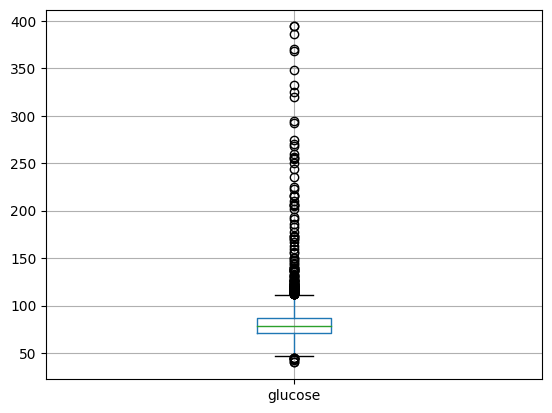

In [ ]:
dataset.boxplot(column='glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

**EDA PROCESS**

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

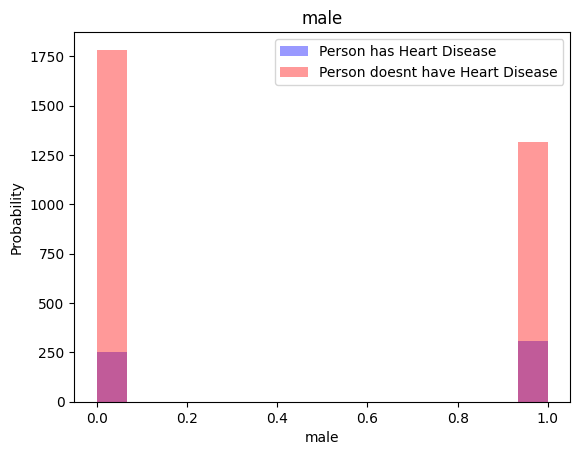

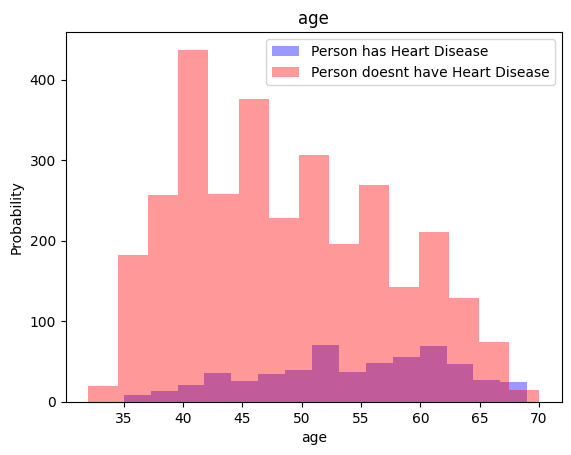

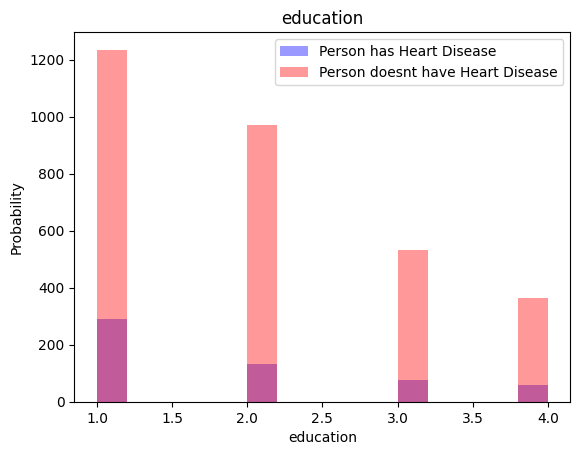

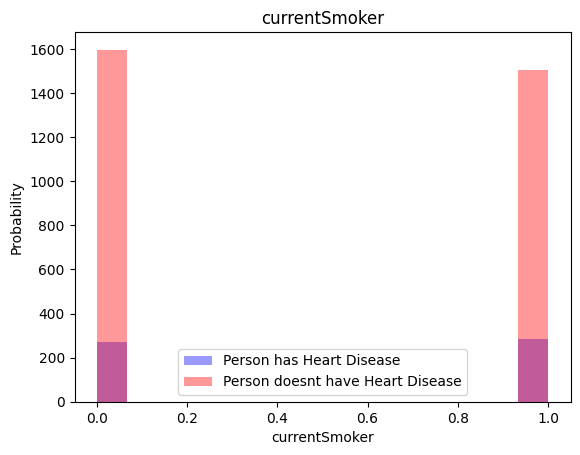

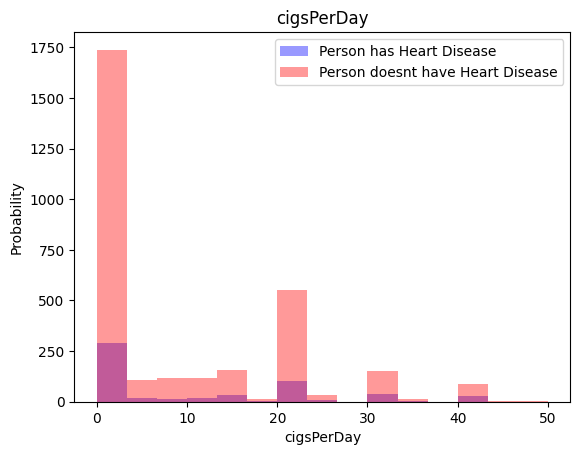

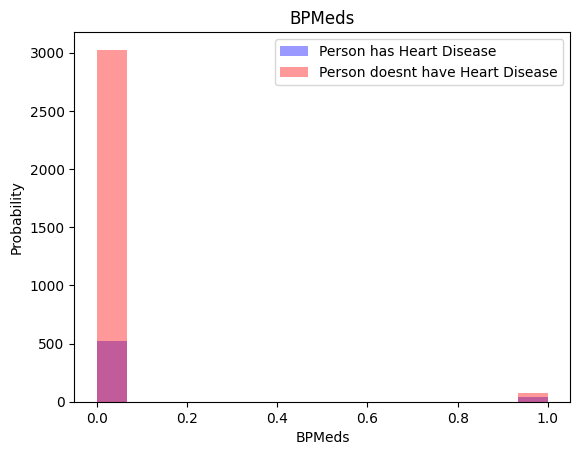

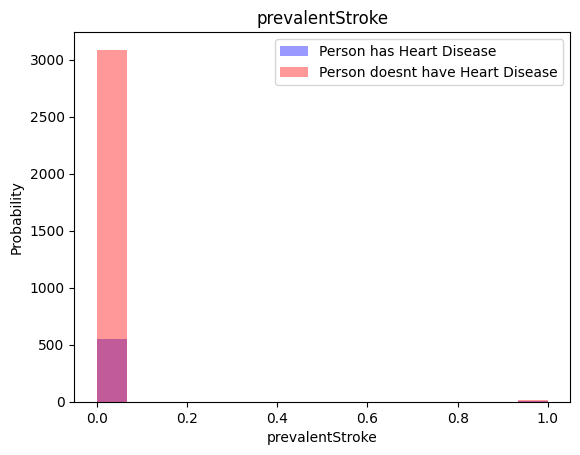

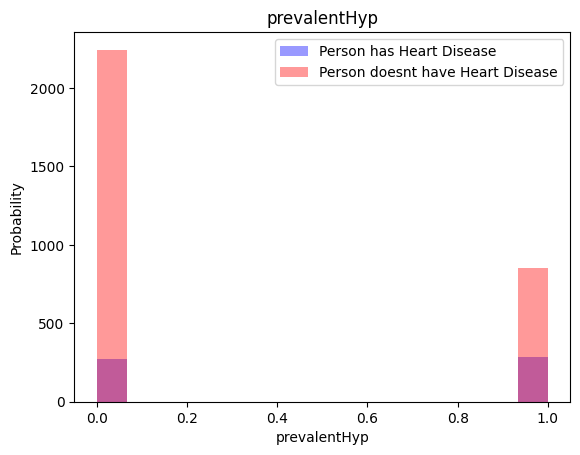

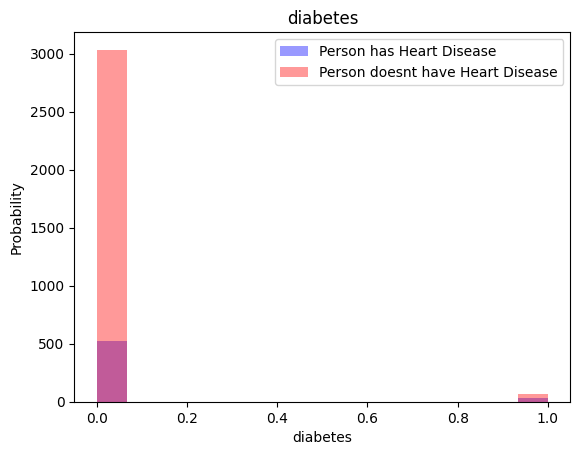

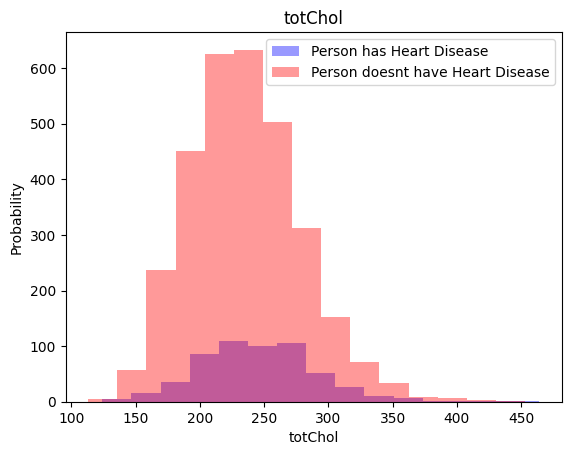

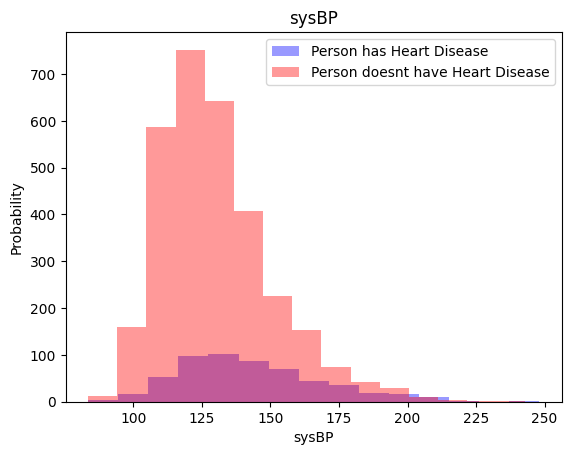

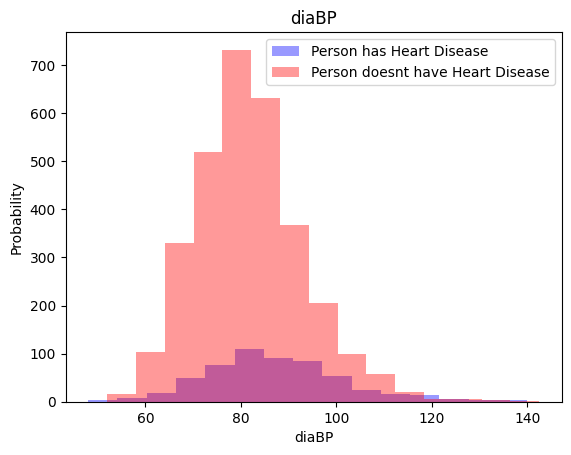

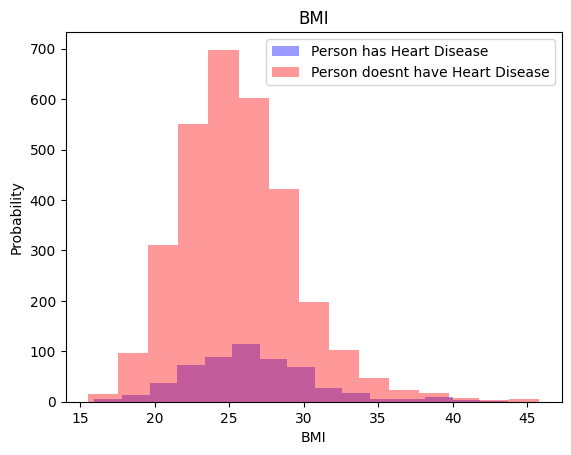

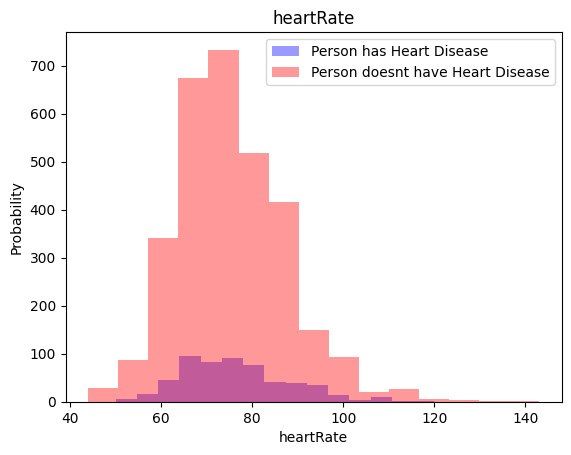

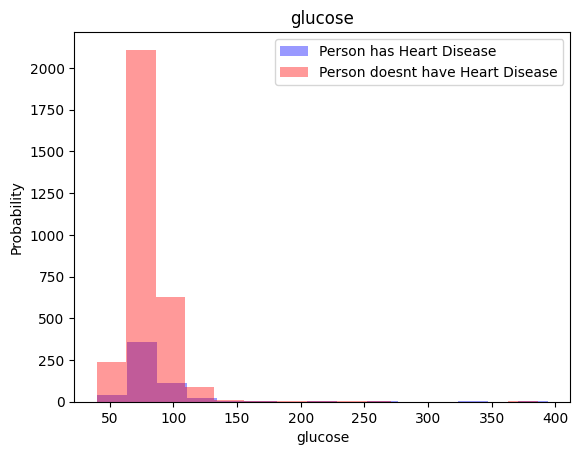

In [ ]:
for i in range(len(dataset.columns[:-1])):
    label = dataset.columns[i]
    plt.hist(dataset[dataset['TenYearCHD'] == 1][label], color = 'blue', label= 'Person has Heart Disease' ,alpha = 0.4, bins=15)
    plt.hist(dataset[dataset['TenYearCHD'] == 0][label], color = 'red', label= 'Person doesnt have Heart Disease', alpha = 0.4, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.326545,-0.052128,-0.002308,0.000806,0.013833,-0.068860,-0.043965,0.051575,0.077350,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.194610,0.134670,0.050864,0.306693,0.109027,0.269635,0.387947,0.208880,0.135316,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.016949,-0.013647,-0.030353,-0.079100,-0.039547,-0.013123,-0.123447,-0.058502,-0.135404,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.782378,-0.051936,-0.038159,-0.107561,-0.041859,-0.049377,-0.133340,-0.115748,-0.157922,0.050452,-0.053346,0.019176
cigsPerDay,0.326545,-0.194610,0.016949,0.782378,1.000000,-0.045577,-0.036340,-0.077036,-0.035896,-0.036120,-0.096494,-0.061856,-0.091328,0.064873,-0.054116,0.055431
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.045577,1.000000,0.113119,0.263047,0.049051,0.095297,0.273693,0.199750,0.097438,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036340,0.113119,1.000000,0.066098,0.009619,0.012989,0.061696,0.055878,0.013899,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.077036,0.263047,0.066098,1.000000,0.080623,0.165268,0.699922,0.617634,0.301231,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.035896,0.049051,0.009619,0.080623,1.000000,0.035200,0.103690,0.050767,0.090834,0.060996,0.614817,0.093397
totChol,-0.068860,0.269635,-0.013123,-0.049377,-0.036120,0.095297,0.012989,0.165268,0.035200,1.000000,0.220279,0.174527,0.124075,0.093503,0.044688,0.086623


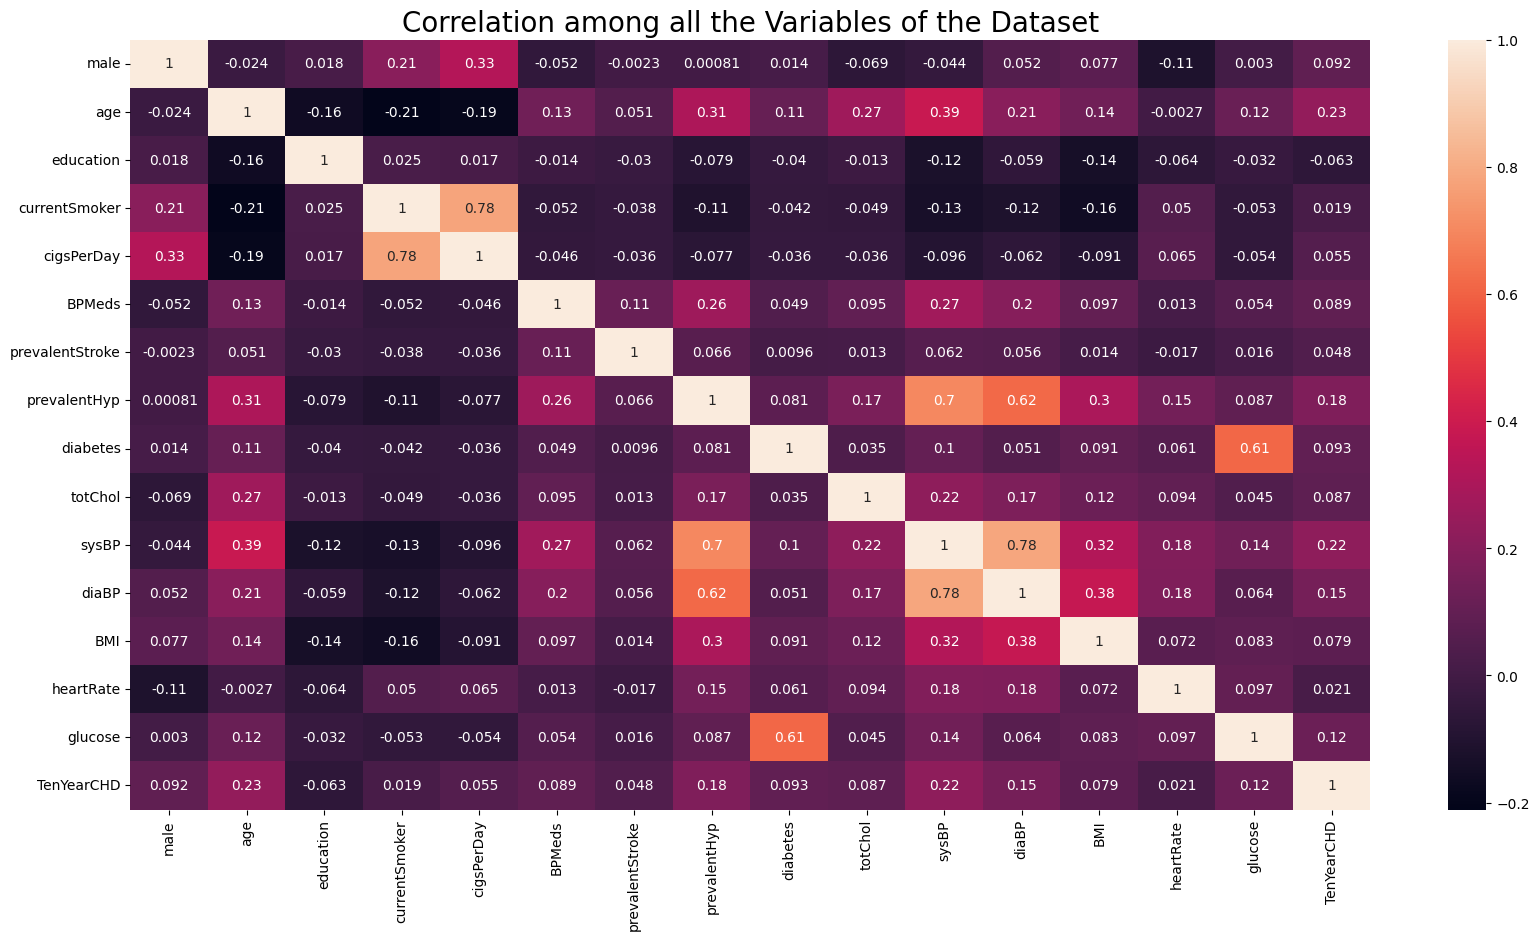

In [ ]:
import seaborn as sns
cor=dataset.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

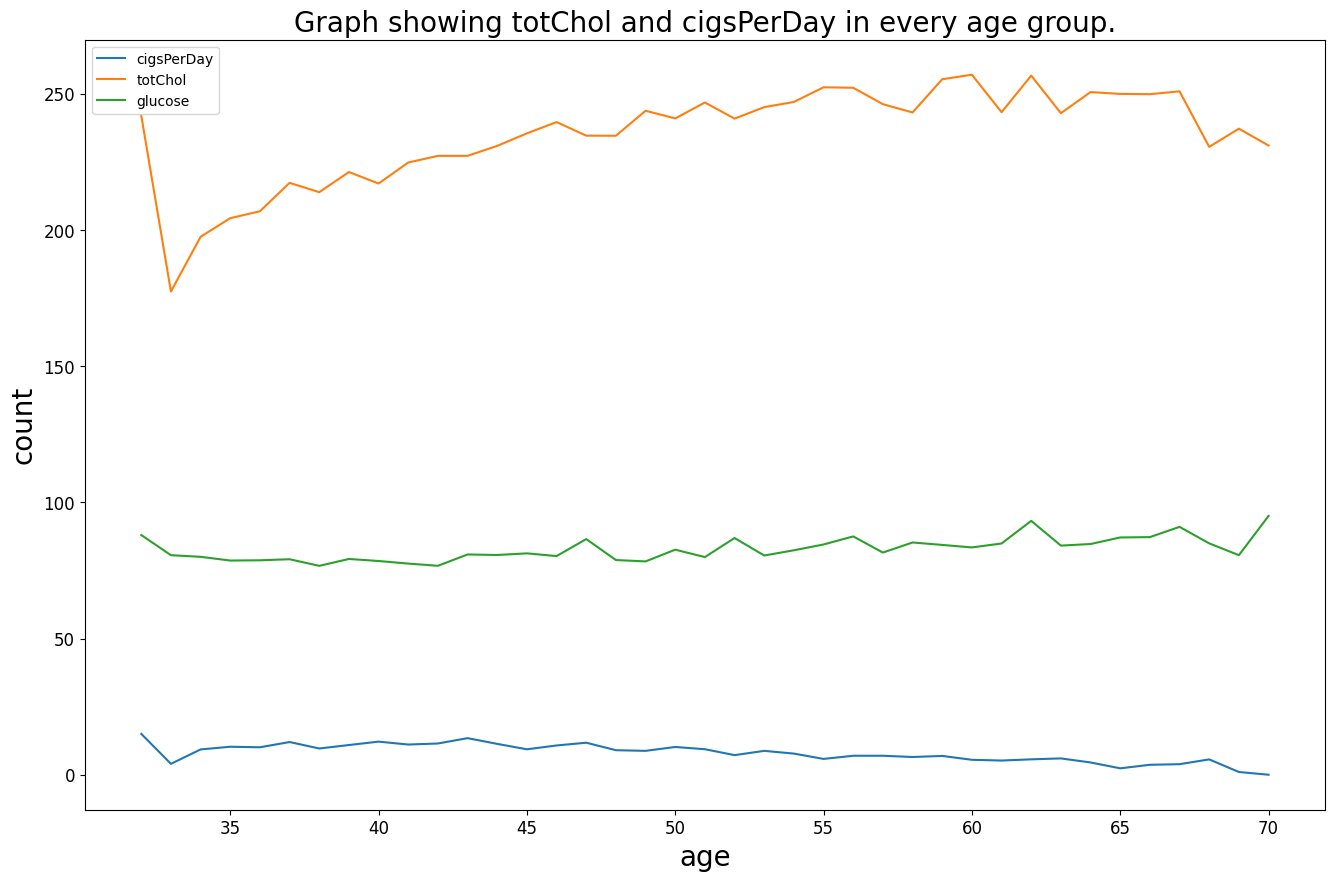

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = dataset.groupby("age").cigsPerDay.mean()
graph_6 = dataset.groupby("age").totChol.mean()
graph_7 = dataset.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.

totChol has a steep, linear and inverse graph for lower ranges of age

cigsPerDay has a fairly parallel relationship with age

In [ ]:
dataset.shape #after preprocessing

(3656, 16)

**Checking the balance of data**

In [ ]:
dataset['TenYearCHD'].value_counts() #Return the count of unique elements in TenYearCHD column

0    3099
1     557
Name: TenYearCHD, dtype: int64

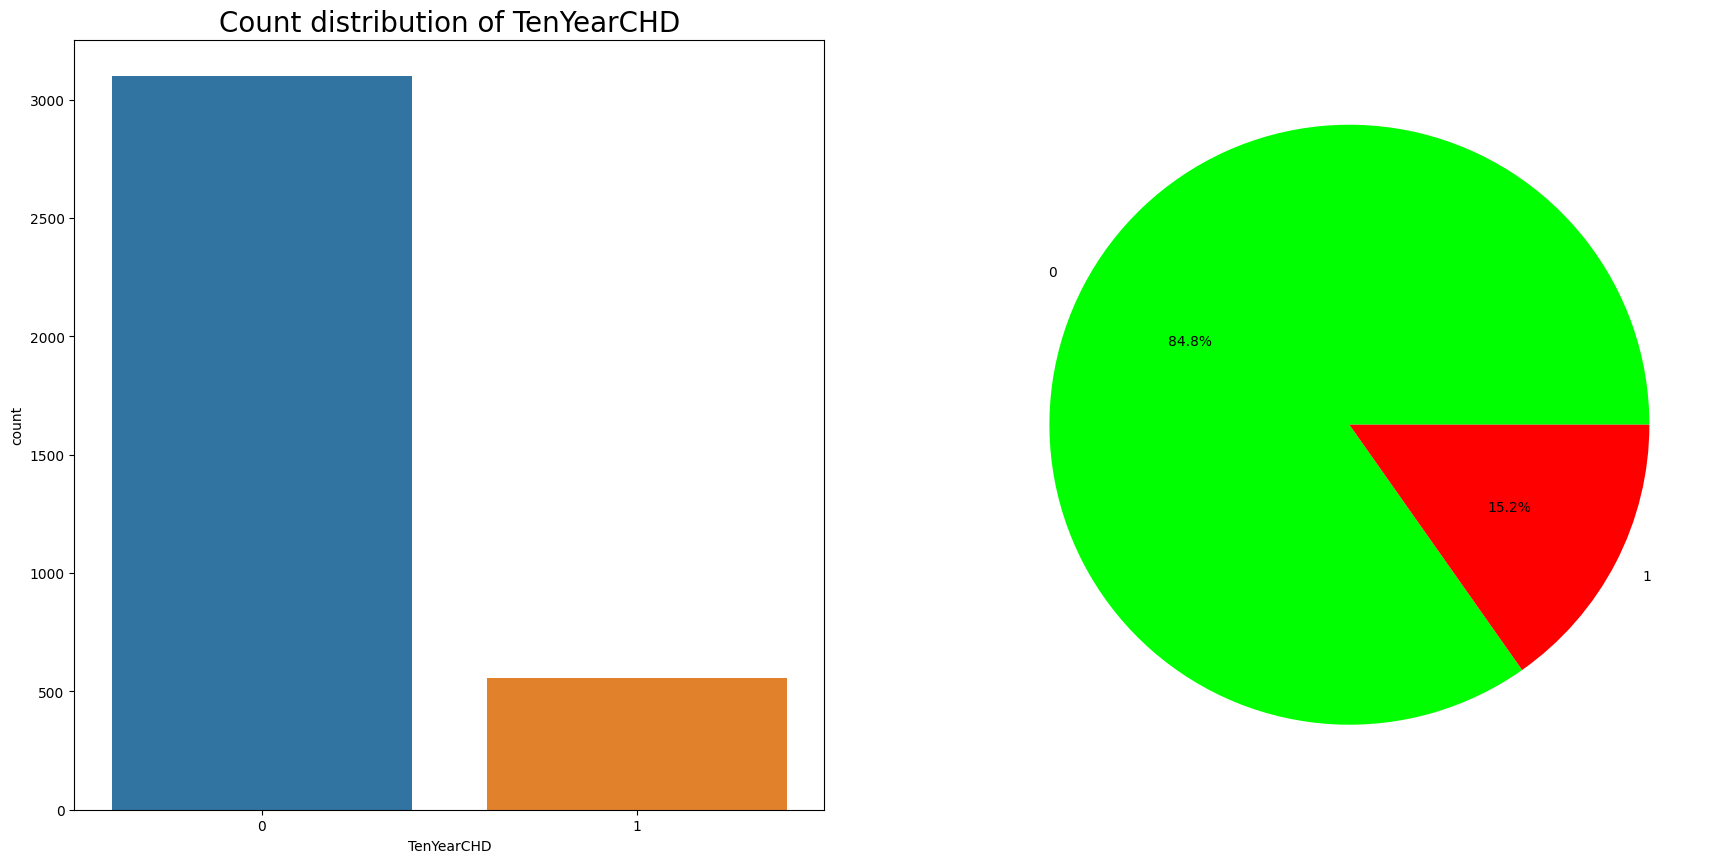

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=dataset)
plt.title("Count distribution of TenYearCHD", size=20)   # Checking balance of outcome variable
plt.subplot(122)
labels=[0,1]
plt.pie(dataset["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

Observations :
1. We can see that we've imbalanced Dataset having ratio of 85:15 where Positive Class is Minor.(as the number of people without the disease greatly exceeds the number of people with the disease.)
2. If the data is imbalanced, the model may overfit to the majority class and fail to generalize well to new data. Balancing the data before feature selection can help to address this issue and improve the overall performance of the model.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import StackingClassifier
X = dataset.drop('TenYearCHD', axis=1)
y = dataset['TenYearCHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

cnn = models.Sequential([
    layers.Reshape((X_train.shape[1], 1, 1), input_shape=(X_train.shape[1], 1, 1)),
    layers.Conv2D(32, (3, 1), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 1)),
    layers.Conv2D(64, (3, 1), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 1)),
    layers.Conv2D(128, (3, 1), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy')

# Train the CNN on the original dataset
cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Extract features from the entire dataset using the CNN
X_cnn = cnn.predict(X.values.reshape(X.shape[0], X.shape[1], 1, 1))

# Combine the features with the original dataset
X_combined = np.concatenate((X, X_cnn), axis=1)

# Perform SMOTE oversampling on the combined dataset
smote = SMOTE()
X_combined_resampled, y_resampled = smote.fit_resample(X_combined, y)

# Split the resampled dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined_resampled, y_resampled, test_size=0.2, random_state=42)


Epoch 1/10
74/74 [==============================] - 2s 10ms/step - loss: 4.8633 - val_loss: 4.4680
Epoch 2/10
74/74 [==============================] - 0s 7ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 3/10
74/74 [==============================] - 1s 12ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 4/10
74/74 [==============================] - 1s 11ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 5/10
74/74 [==============================] - 1s 12ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 6/10
74/74 [==============================] - 1s 9ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 7/10
74/74 [==============================] - 1s 7ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 8/10
74/74 [==============================] - 1s 7ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 9/10
74/74 [==============================] - 1s 7ms/step - loss: 4.6734 - val_loss: 4.4680
Epoch 10/10
115/115 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the base classifiers
base_classifiers = [RandomForestClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier(),XGBClassifier()]

# Train each base classifier on the training set
base_predictions = []
for clf in base_classifiers:
    clf.fit(X_train_combined, y_train_combined)
    base_predictions.append(clf.predict(X_test_combined))

# Concatenate the predictions from the base classifiers
X_meta = np.column_stack(base_predictions)

# Train the LightGBM Classifier on the new feature matrix
meta_clf = LGBMClassifier()
meta_clf.fit(X_meta, y_test_combined)

# Generate predictions on the test set using the stacked model
test_predictions = []
for clf in base_classifiers:
    test_predictions.append(clf.predict(X_test_combined))
stacked_test_predictions = np.column_stack(test_predictions)
meta_predictions = meta_clf.predict(stacked_test_predictions)

# Evaluate the performance of the stacked model
accuracy = accuracy_score(y_test_combined, meta_predictions)
precision = precision_score(y_test_combined, meta_predictions)
recall = recall_score(y_test_combined, meta_predictions)
f1 = f1_score(y_test_combined, meta_predictions)
roc_auc = roc_auc_score(y_test_combined, meta_predictions)

print("Accuracy of the stacked model: {:.2f}%".format(accuracy * 100))
print("Precision of the stacked model: {:.2f}%".format(precision * 100))
print("Recall of the stacked model: {:.2f}%".format(recall * 100))
print("F1 score of the stacked model: {:.2f}%".format(f1 * 100))
print("ROC-AUC score of the stacked model: {:.2f}%".format(roc_auc * 100))
print("Confusion matrix on test set (stacking classifier):\n", confusion_matrix(y_test_combined, meta_predictions))

Accuracy of the stacked model: 94.11%
Precision of the stacked model: 92.71%
Recall of the stacked model: 95.83%
F1 score of the stacked model: 94.25%
ROC-AUC score of the stacked model: 94.10%
Confusion matrix on test set (stacking classifier):
 [[569  47]
 [ 26 598]]


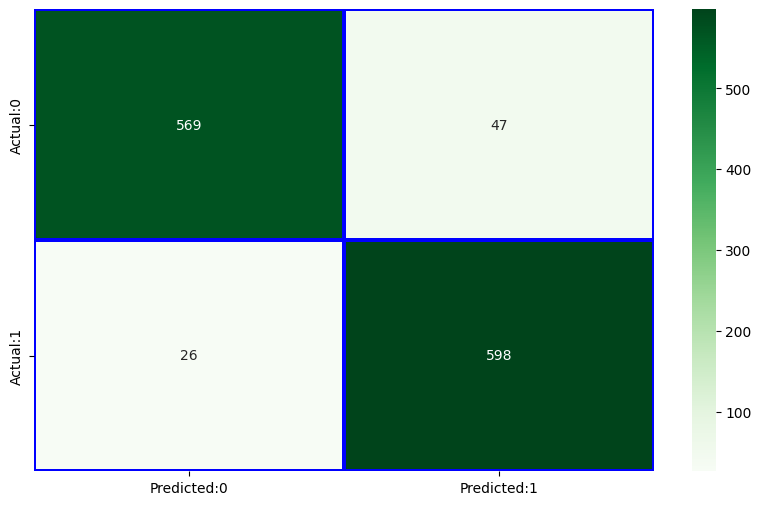

In [ ]:
conf_mat2 = confusion_matrix(y_test_combined, meta_predictions)

#Plotting the confusion matrix
conf_matrix2 = pd.DataFrame(data = conf_mat2,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()